In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/rathi/Downloads/sales_data Task 1.csv")

In [5]:
df

,Date,Product,Region,Sales Rep,Sales Amount,Profit,Units Sold
0,03-05-2024,Laptop,North,Charlie,955.47,51.83,4
1,10-03-2024,Headphones,West,Charlie,784.11,299.66,4
2,20-02-2024,Smartphone,North,Charlie,1222.00,362.96,32
3,22-03-2024,Tablet,South,David,1874.16,122.37,28
4,14-06-2024,Laptop,East,Bob,545.67,418.81,45
...,...,...,...,...,...,...,...
145,27-03-2024,Monitor,North,David,427.51,357.97,39
146,05-05-2024,Smartwatch,North,Bob,1473.69,175.26,48
147,28-02-2024,Smartwatch,East,David,573.76,133.83,36
148,16-04-2024,Smartphone,North,Alice,1516.70,204.96,21


In [7]:
df.head(5)

,Date,Product,Region,Sales Rep,Sales Amount,Profit,Units Sold
0,03-05-2024,Laptop,North,Charlie,955.47,51.83,4
1,10-03-2024,Headphones,West,Charlie,784.11,299.66,4
2,20-02-2024,Smartphone,North,Charlie,1222.00,362.96,32
3,22-03-2024,Tablet,South,David,1874.16,122.37,28
4,14-06-2024,Laptop,East,Bob,545.67,418.81,45


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          150 non-null    object 
 1   Product       150 non-null    object 
 2   Region        150 non-null    object 
 3   Sales Rep     150 non-null    object 
 4   Sales Amount  150 non-null    float64
 5   Profit        150 non-null    float64
 6   Units Sold    150 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 8.3+ KB


In [11]:
df.isnull().sum() 

Date            0
Product         0
Region          0
Sales Rep       0
Sales Amount    0
Profit          0
Units Sold      0
dtype: int64

In [13]:
df.describe() 

,Sales Amount,Profit,Units Sold
count,150.000000,150.000000,150.000000
mean,1020.360067,266.083400,26.480000
std,538.964078,125.980592,15.588552
min,108.260000,50.550000,1.000000
25%,494.065000,171.870000,12.000000
50%,1030.180000,261.120000,27.000000
75%,1466.235000,368.697500,40.000000
max,1975.490000,499.200000,50.000000


In [15]:
df.duplicated().sum()

0

C:\Users\rathi\AppData\Local\Temp\ipykernel_4812\1620795514.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_units_sold.index, y=total_units_sold.values, palette='viridis')  # Creates a bar graph.


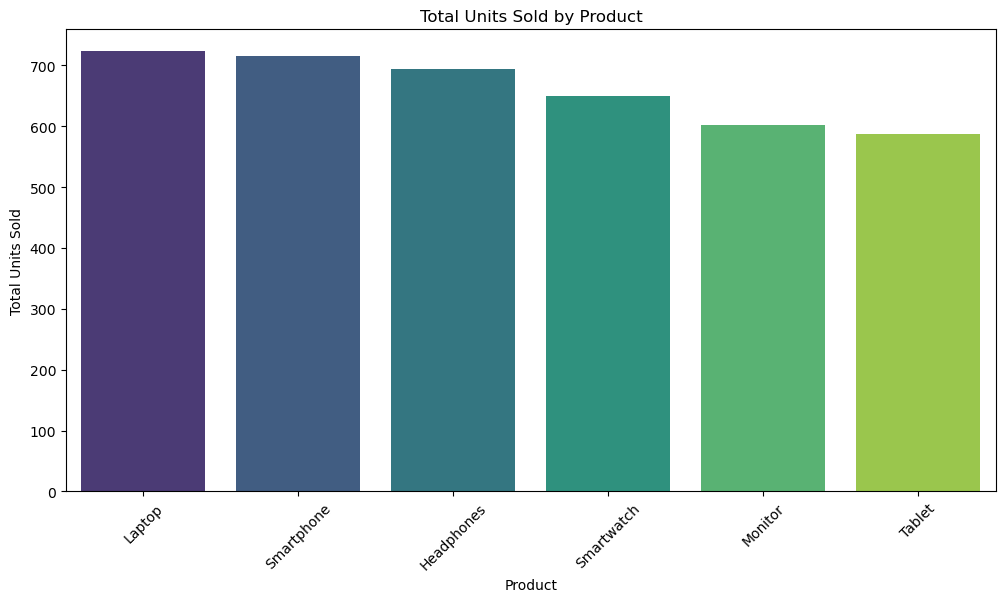

In [27]:
plt.figure(figsize=(12, 6))  # Creates a new figure with specified size.

# Assuming 'Product' is the column with product names and 'Units Sold' is the quantity sold
total_units_sold = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)

sns.barplot(x=total_units_sold.index, y=total_units_sold.values, palette='viridis')  # Creates a bar graph.
plt.title('Total Units Sold by Product')  # Adds a title to the plot.
plt.xlabel('Product')  # Label for x-axis.
plt.ylabel('Total Units Sold')  # Label for y-axis.
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability.
plt.show()

C:\Users\rathi\AppData\Local\Temp\ipykernel_4812\4052013589.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sales Rep', y='Sales Amount', ci=None, palette='coolwarm')
C:\Users\rathi\AppData\Local\Temp\ipykernel_4812\4052013589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sales Rep', y='Sales Amount', ci=None, palette='coolwarm')


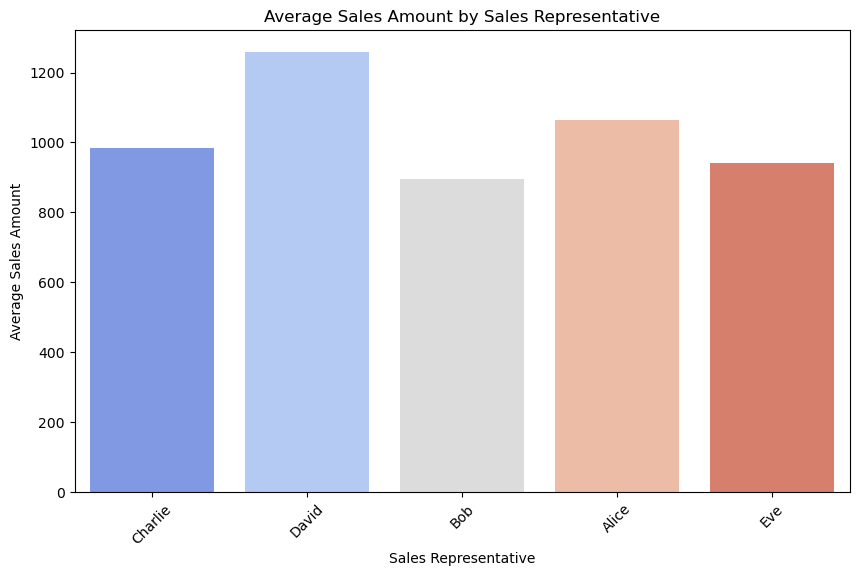

In [33]:
plt.figure(figsize=(10, 6))  # Creates a new figure with a specific size.

# Creates a barplot showing the average sales amount by sales representative.
sns.barplot(data=df, x='Sales Rep', y='Sales Amount', ci=None, palette='coolwarm')

# Adds a title and labels for the plot.
plt.title('Average Sales Amount by Sales Representative')
plt.xlabel('Sales Representative')
plt.ylabel('Average Sales Amount')

# Adjusts the x-axis labels for better readability.
plt.xticks(rotation=45)  # Rotates x-axis labels if sales rep names are long.
plt.show()  # Displays the plot.

In [35]:
numeric_df = df.select_dtypes(include=['number'])

# Check correlation matrix
numeric_df.corr()


,Sales Amount,Profit,Units Sold
Sales Amount,1.000000,-0.011024,-0.075776
Profit,-0.011024,1.000000,-0.089977
Units Sold,-0.075776,-0.089977,1.000000


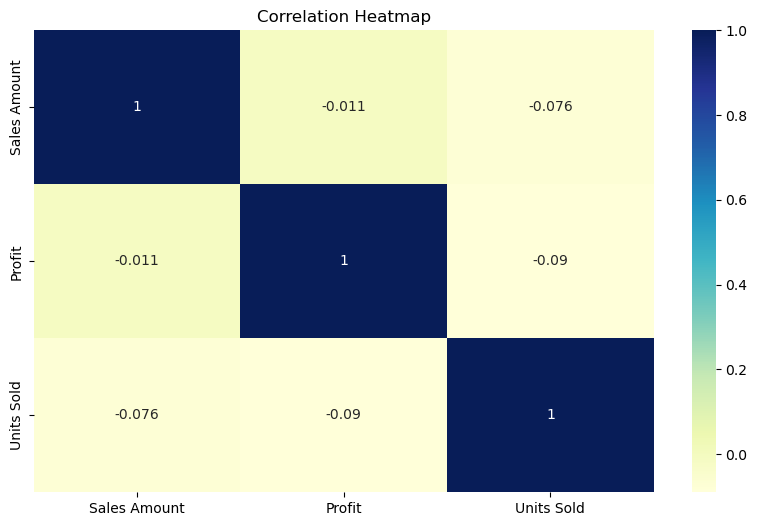

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()